# Day 5 Pandas:

This exercise is all about pandas!

![](pandas.gif)

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

## 1 Create DataFrames

We want to create some DataFrames with given structure, therefore fill the values with random numbers or categories.
- create one Dataframe by joining two Series, one with the category fruits, which has at least 5 different fruits. the other Series represent the price
- create a 24 x 7 numpy array, and build a DataFrame from it. The column index should be the days of the week, while the row index are the hours.
- write a dictionary containing cities. The city's name should be the key, and the following tuple should be the value for each key: _(population, name_of_country, isCapital, size, location-lat, location-long,)_. (google some cities)

In [10]:
fruit = pd.Series(['apple', 'banana', 'melon', 'pineapple', 'strawberry', 'litch'])
price = pd.Series([1, 3, 7, 7, 8, 12])
df1 = pd.concat([fruit, price], axis=1)

day = ['Sun','Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat']
df2 = pd.DataFrame(np.random.randn(24, 7), index=range(24), columns=day)

dic = {'Seoul':(9838892, 'South Korea', True, 605.21, 37, 126),
      'Shanghai':(24237800, 'China', False, 6341, 31, 121),
      'Glasgow':(626410, 'UK', False, 175, 55, 4),
      'Berlin':(3748148, 'Germany', True, 891.1, 52, 13)}

#df1
#df2
pd.DataFrame(dic, index=['population', 'nameof_country', 'isCapital', 'size', 'location-lat', 'location-long'])

,Seoul,Shanghai,Glasgow,Berlin
population,9838892,24237800,626410,3748148
nameof_country,South Korea,China,UK,Germany
isCapital,True,False,False,True
size,605.21,6341,175,891.1
location-lat,37,31,55,52
location-long,126,121,4,13


## 2 Analyze Data

We want to analyze some data about some car seller. Therefore load the csv file _Automobile_data.csv_. Since the data is not fully clean, Replace all column values which contain ‘?’ and n.a with np.NaN.

Afterwards answer the following questions:
- whats the most expensive car's company name? Print out the car's name, company and price
- Count total cars per company
- Find each company’s Higesht price car
- Find the average mileage of each car making company
- Whats the average price for a Toyota?
- do all Mercedes have more PS than Toyotas?


In [46]:
aut = pd.read_csv('Automobile_data.csv')
#aut.replace("?", np.NaN)
aut.fillna(np.NaN)
q1 = aut.loc[aut['price'].idxmax()][['company', 'price']]
#aut[(aut.price.max()==df.price)][['company', 'price']]
q2 = aut['company'].value_counts()
q3 = aut.loc[aut.groupby(['company'])['price'].idxmax()]
#just max is ok
q4 = aut.groupby(['company']).mean()['average-mileage']
q5 = aut.groupby(['company']).mean()['price']['toyota']
q6 = aut.groupby(['company'])['horsepower'].max()['toyota'] < aut.groupby(['company'])['horsepower'].min()['mercedes-benz']

print("Q1)\n", q1)
print("\nQ2)\n", q2)
print('\nQ3\n', q3)
print('\nQ4\n', q4)
print('\nQ5\n', q5)
print('\nQ6\n', q6)

Q1)
 company    mercedes-benz
price              45400
Name: 35, dtype: object

Q2)
 toyota           7
bmw              6
nissan           5
mazda            5
mercedes-benz    4
mitsubishi       4
volkswagen       4
audi             4
isuzu            3
chevrolet        3
alfa-romero      3
jaguar           3
honda            3
porsche          3
volvo            2
dodge            2
Name: company, dtype: int64

Q3
 company
alfa-romero      16500.0
audi             18920.0
bmw              41315.0
chevrolet         6575.0
dodge             6377.0
honda            12945.0
isuzu             6785.0
jaguar           36000.0
mazda            18344.0
mercedes-benz    45400.0
mitsubishi        8189.0
nissan           13499.0
porsche          37028.0
toyota           15750.0
volkswagen        9995.0
volvo            13415.0
Name: price, dtype: float64

Q4
 company
alfa-romero      20.333333
audi             20.000000
bmw              19.000000
chevrolet        41.000000
dodge            31.0

## 3 Plotting

Your employer wants to finally get to know his employers. Help him by reading the dataset in _employees.xlsx_ and creating the following plots:
- a histogram for the distrubution of age, with bin size = 5
- a bar chart showing the count for each country

Also, find out the most frequent name of the employees. Whats the likelihood your employer will call the next worker by his correct name, assuming he only remembers one.


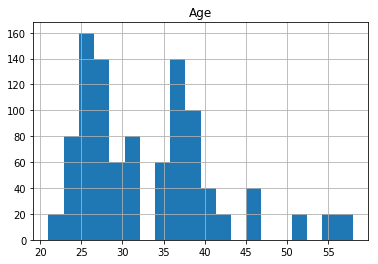

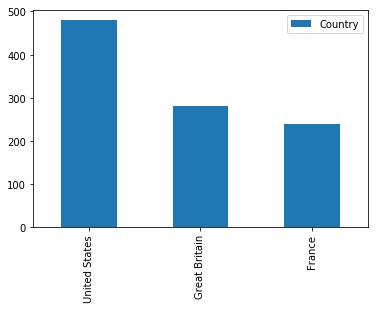

Wachtel 0.25


In [51]:
import matplotlib.pyplot as plt

emp = pd.read_excel('employees.xlsx')
emp.hist(column='Age', bins=20) #bins -> number of bins
pd.DataFrame(emp['Country'].value_counts()).plot.bar()
plt.show()
name = emp['Last Name'].value_counts().idxmax()

#emp.drop_duplicates("First Name")

print(name, emp['Last Name'].value_counts().max()/emp.size*100)

## 4 One Hot Encoding with Pandas

use the function `pandas.get_dummies()` to one-hot-encode our dataset in ¶_NewStudentPerformance.csv_. The documentation is here: https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.get_dummies.html. Create a sub-Dataframe, which holds only numerical values. Compare your result with the result in exercise 4.4. You will probably need to move some columns arround, to match the columns! 
Do I have the same encoding?


In [53]:
stud = pd.read_csv('NewStudentPerformance.csv')
targ = ['lunch', 'race/ethnicity', 'gender', 'parental level of education', 'test preparation course']
substud = stud[[x for x in stud.columns if x not in targ]]
#pd.get_dummies(stud, columns=targ)
newstud = substud
for t in targ:
    newstud=pd.concat((newstud, pd.get_dummies(stud[t])),axis=1)
newstud

,python score,ids,writing score,reading score,math score,free/reduced,standard,group A,group B,group C,...,female,male,associate's degree,bachelor's degree,high school,master's degree,some college,some high school,completed,none
0,89,'6480',74,72,72,0,1,0,1,0,...,1,0,0,1,0,0,0,0,0,1
1,70,'7374',88,90,69,0,1,0,0,1,...,1,0,0,0,0,0,1,0,1,0
2,78,'1160',93,95,90,0,1,0,1,0,...,1,0,0,0,0,1,0,0,0,1
3,90,'3404',44,57,47,1,0,1,0,0,...,0,1,1,0,0,0,0,0,0,1
4,99,'9819',75,78,76,0,1,0,0,1,...,0,1,0,0,0,0,1,0,0,1
5,80,'5713',78,83,71,0,1,0,1,0,...,1,0,1,0,0,0,0,0,0,1
6,82,'7028',92,95,88,0,1,0,1,0,...,1,0,0,0,0,0,1,0,1,0
7,87,'6800',39,43,40,1,0,0,1,0,...,0,1,0,0,0,0,1,0,0,1
8,80,'6331',67,64,64,1,0,0,0,0,...,0,1,0,0,1,0,0,0,1,0
9,89,'5158',50,60,38,1,0,0,1,0,...,1,0,0,0,1,0,0,0,0,1


## 4.1 Custom Index

Extend our dataset with a custom Index, where the index should be the ID of the students. To make you implemented the Index correctly, try to acces students over their ID.

In [54]:
newstud = newstud.set_index(newstud['ids'])
newstud
#newstud.iloc[4], newstud.loc["'9819'"]

,python score,ids,writing score,reading score,math score,free/reduced,standard,group A,group B,group C,...,female,male,associate's degree,bachelor's degree,high school,master's degree,some college,some high school,completed,none
ids,,,,,,,,,,,,,,,,,,,,,
'6480',89,'6480',74,72,72,0,1,0,1,0,...,1,0,0,1,0,0,0,0,0,1
'7374',70,'7374',88,90,69,0,1,0,0,1,...,1,0,0,0,0,0,1,0,1,0
'1160',78,'1160',93,95,90,0,1,0,1,0,...,1,0,0,0,0,1,0,0,0,1
'3404',90,'3404',44,57,47,1,0,1,0,0,...,0,1,1,0,0,0,0,0,0,1
'9819',99,'9819',75,78,76,0,1,0,0,1,...,0,1,0,0,0,0,1,0,0,1
'5713',80,'5713',78,83,71,0,1,0,1,0,...,1,0,1,0,0,0,0,0,0,1
'7028',82,'7028',92,95,88,0,1,0,1,0,...,1,0,0,0,0,0,1,0,1,0
'6800',87,'6800',39,43,40,1,0,0,1,0,...,0,1,0,0,0,0,1,0,0,1
'6331',80,'6331',67,64,64,1,0,0,0,0,...,0,1,0,0,1,0,0,0,1,0


## 5 Advanced: Crime Analyst

You work for the CIS (or BND, just something kinda cool). Your task is to help to prevent crime using data. Therefore read the file _crime.csv_ (this is a very big file, might take some tim to load. You can also cut it by slicing it...) 

First:
- remove the column "SHOOTING", 
- Clean the data, by droping all rows where the data is not complete

fullfil the following tasks:

- in a bar chart, plot the count for each crime type (use the column OFFENSE_CODE_GROUP)
- whats the most crimeful day of the week? month? year?
- show the average crimes per hour in a line chart(x-hour, y-avg no. crime)
- for each district, find the street with the most crimes
- For each district, predict the exact location for the next Robbery

In [2]:
cri = pd.read_csv('crime.csv', encoding='latin-1')
cri = cri.drop(['SHOOTING'], axis=1)
cri = cri.dropna(how='any')
cri

,INCIDENT_NUMBER,OFFENSE_CODE,OFFENSE_CODE_GROUP,OFFENSE_DESCRIPTION,DISTRICT,REPORTING_AREA,OCCURRED_ON_DATE,YEAR,MONTH,DAY_OF_WEEK,HOUR,UCR_PART,STREET,Lat,Long,Location
0,I182070945,619,Larceny,LARCENY ALL OTHERS,D14,808,2018-09-02 13:00:00,2018,9,Sunday,13,Part One,LINCOLN ST,42.357791,-71.139371,"(42.35779134, -71.13937053)"
1,I182070943,1402,Vandalism,VANDALISM,C11,347,2018-08-21 00:00:00,2018,8,Tuesday,0,Part Two,HECLA ST,42.306821,-71.060300,"(42.30682138, -71.06030035)"
2,I182070941,3410,Towed,TOWED MOTOR VEHICLE,D4,151,2018-09-03 19:27:00,2018,9,Monday,19,Part Three,CAZENOVE ST,42.346589,-71.072429,"(42.34658879, -71.07242943)"
3,I182070940,3114,Investigate Property,INVESTIGATE PROPERTY,D4,272,2018-09-03 21:16:00,2018,9,Monday,21,Part Three,NEWCOMB ST,42.334182,-71.078664,"(42.33418175, -71.07866441)"
4,I182070938,3114,Investigate Property,INVESTIGATE PROPERTY,B3,421,2018-09-03 21:05:00,2018,9,Monday,21,Part Three,DELHI ST,42.275365,-71.090361,"(42.27536542, -71.09036101)"
5,I182070936,3820,Motor Vehicle Accident Response,M/V ACCIDENT INVOLVING PEDESTRIAN - INJURY,C11,398,2018-09-03 21:09:00,2018,9,Monday,21,Part Three,TALBOT AVE,42.290196,-71.071590,"(42.29019621, -71.07159012)"
6,I182070933,724,Auto Theft,AUTO THEFT,B2,330,2018-09-03 21:25:00,2018,9,Monday,21,Part One,NORMANDY ST,42.306072,-71.082733,"(42.30607218, -71.08273260)"
7,I182070932,3301,Verbal Disputes,VERBAL DISPUTE,B2,584,2018-09-03 20:39:37,2018,9,Monday,20,Part Three,LAWN ST,42.327016,-71.105551,"(42.32701648, -71.10555088)"
8,I182070931,301,Robbery,ROBBERY - STREET,C6,177,2018-09-03 20:48:00,2018,9,Monday,20,Part One,MASSACHUSETTS AVE,42.331521,-71.070853,"(42.33152148, -71.07085307)"
9,I182070929,3301,Verbal Disputes,VERBAL DISPUTE,C11,364,2018-09-03 20:38:00,2018,9,Monday,20,Part Three,LESLIE ST,42.295147,-71.058608,"(42.29514664, -71.05860832)"


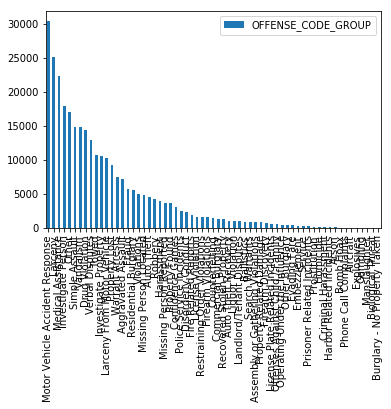

In [155]:
pd.DataFrame(cri['OFFENSE_CODE_GROUP'].value_counts()).plot.bar()

In [173]:
print("day: ",cri['DAY_OF_WEEK'].value_counts().idxmax())
print("month: ",cri['MONTH'].value_counts().idxmax())
print("year: ",cri['YEAR'].value_counts().idxmax())

day:  Friday
month:  8
year:  2017


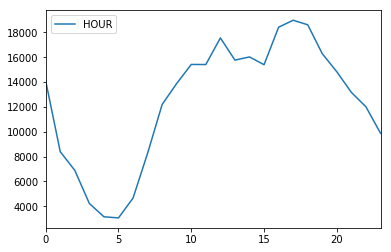

In [190]:
pd.DataFrame(cri['HOUR'].value_counts().sort_index()).plot.line()

In [226]:
cri.groupby(['DISTRICT'])['STREET'].value_counts().unstack().idxmax(axis=1)

DISTRICT
A1         WASHINGTON ST
A15       BUNKER HILL ST
A7             BORDER ST
B2         WASHINGTON ST
B3         BLUE HILL AVE
C11       DORCHESTER AVE
C6     MASSACHUSETTS AVE
D14     COMMONWEALTH AVE
D4           BOYLSTON ST
E13            CENTRE ST
E18        HYDE PARK AVE
E5         WASHINGTON ST
dtype: object

In [56]:
cri.groupby(['DISTRICT'])['STREET'].value_counts().groupby(['DISTRICT']).idxmax()

DISTRICT
A1         (A1, WASHINGTON ST)
A15      (A15, BUNKER HILL ST)
A7             (A7, BORDER ST)
B2         (B2, WASHINGTON ST)
B3         (B3, BLUE HILL AVE)
C11      (C11, DORCHESTER AVE)
C6     (C6, MASSACHUSETTS AVE)
D14    (D14, COMMONWEALTH AVE)
D4           (D4, BOYLSTON ST)
E13           (E13, CENTRE ST)
E18       (E18, HYDE PARK AVE)
E5         (E5, WASHINGTON ST)
Name: STREET, dtype: object

In [8]:
ncri = cri[30 < cri['Lat']]
ncri = ncri[ncri['Long'] < -60]
ncri.groupby(['DISTRICT'])[['Lat', 'Long']].mean()

,Lat,Long
DISTRICT,,
A1,42.356746,-71.061127
A15,42.375999,-71.062676
A7,42.377356,-71.030829
B2,42.321647,-71.084813
B3,42.286916,-71.085186
C11,42.300049,-71.063252
C6,42.333627,-71.052003
D14,42.350310,-71.142262
D4,42.343515,-71.080907


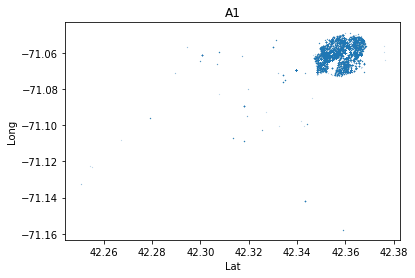

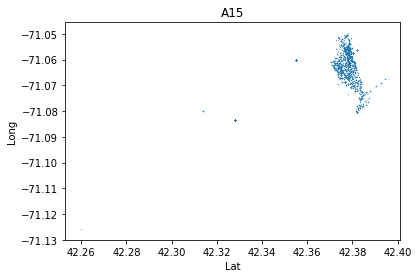

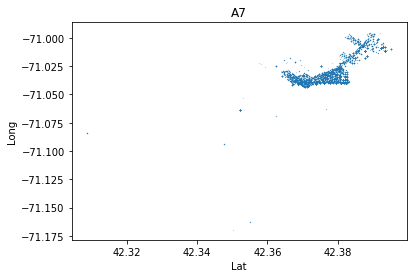

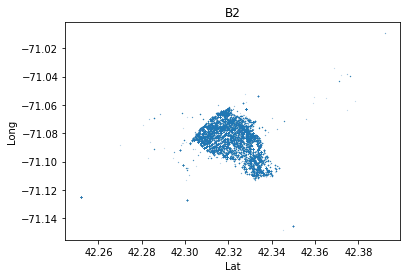

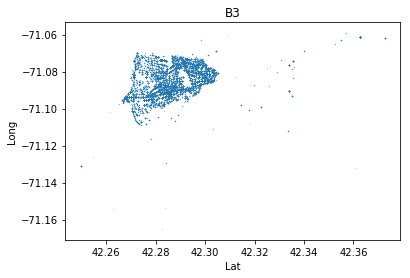

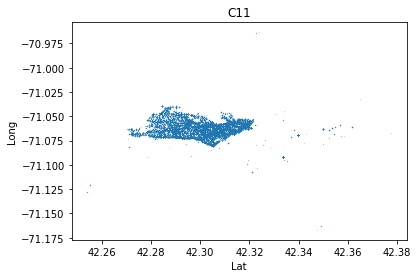

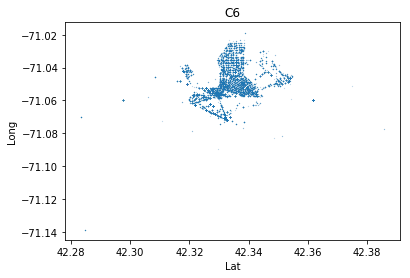

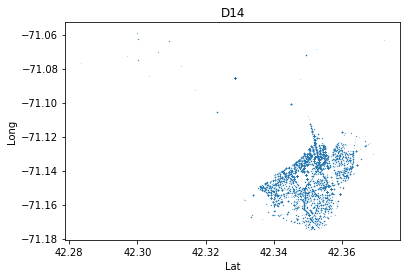

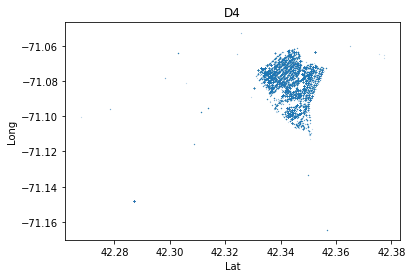

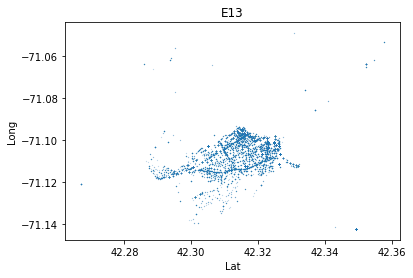

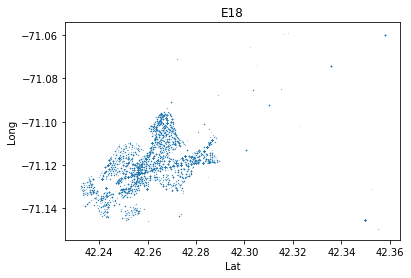

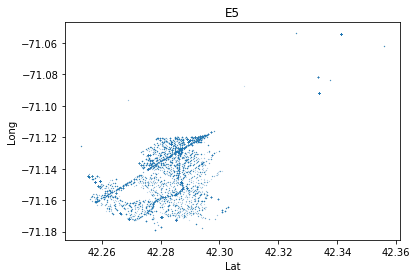

In [38]:
dist = list(set(cri['DISTRICT']))
dist.sort()
ncri = ncri[30 < cri['Lat']]
ncri = ncri[ncri['Long'] < -60]
dc = ncri.groupby(['DISTRICT'])[['Lat', 'Long']]
for e in dist:
    dc.get_group(e).plot.scatter(x='Lat', y='Long', s=0.01, title=e)

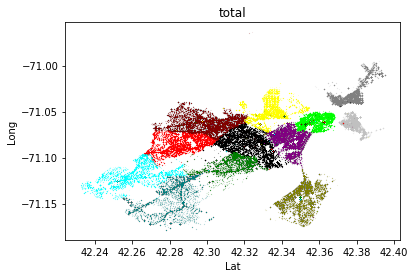

In [57]:
%matplotlib inline
c = ['lime', 'silver', 'gray', 'black', 'red', 'maroon', 'yellow', 'olive', 'purple', 
     'green', 'aqua', 'teal'] 
ax = dc.get_group(dist[0]).plot.scatter(x='Lat', y='Long', s=0.001, title="total", c=c[0])
for i in range(1,len(dist)):
    dc.get_group(dist[i]).plot.scatter(x='Lat', y='Long', s=0.001, ax=ax, c=c[i])